In [506]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_squared_log_error,
    median_absolute_error,
    explained_variance_score,
)
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

In [507]:
df=pd.read_csv("/kaggle/input/artist-sculpture-cost/Artist Sculpture Cost.csv")

In [508]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06-07-2015,06-03-2015,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03-06-2017,03-05-2017,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03-09-2015,03-08-2015,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [509]:
df.shape

(6500, 20)

In [510]:
df.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [511]:
mean=df["Artist Reputation"].mean()
df["Artist Reputation"]=df["Artist Reputation"].fillna(mean)

mean=df["Height"].mean()
df["Height"]=df["Height"].fillna(mean)

mean=df["Weight"].mean()
df["Weight"]=df["Weight"].fillna(mean)


mode=df["Material"].mode()[0]
df["Material"]=df["Material"].fillna(mode)

mode=df["Transport"].mode()[0]
df["Transport"]=df["Transport"].fillna(mode)

mode=df["Remote Location"].mode()[0]
df["Remote Location"]=df["Remote Location"].fillna(mode)

In [512]:
df.isnull().sum()

Customer Id                0
Artist Name                0
Artist Reputation          0
Height                     0
Width                    584
Weight                     0
Material                   0
Price Of Sculpture         0
Base Shipping Price        0
International              0
Express Shipment           0
Installation Included      0
Transport                  0
Fragile                    0
Customer Information       0
Remote Location            0
Scheduled Date             0
Delivery Date              0
Customer Location          0
Cost                       0
dtype: int64

In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Id            6500 non-null   object 
 1   Artist Name            6500 non-null   object 
 2   Artist Reputation      6500 non-null   float64
 3   Height                 6500 non-null   float64
 4   Width                  5916 non-null   float64
 5   Weight                 6500 non-null   float64
 6   Material               6500 non-null   object 
 7   Price Of Sculpture     6500 non-null   float64
 8   Base Shipping Price    6500 non-null   float64
 9   International          6500 non-null   object 
 10  Express Shipment       6500 non-null   object 
 11  Installation Included  6500 non-null   object 
 12  Transport              6500 non-null   object 
 13  Fragile                6500 non-null   object 
 14  Customer Information   6500 non-null   object 
 15  Remo

In [514]:
df.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,6500.000000,6500.000000,5916.000000,6.500000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.249975,11.617773,5.417000,2.554275e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.270000,13.000000,6.000000,5.940000e+02,5.23000,16.700000,1.884400e+02
50%,0.461850,21.000000,8.000000,4.550500e+03,8.02500,23.505000,3.820650e+02
75%,0.640000,29.000000,12.000000,9.830875e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


In [515]:
df["Cost"] = df["Cost"].abs()


In [516]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.000000,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06-07-2015,06-03-2015,"New Michelle, OH 50777",283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.000000,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03-06-2017,03-05-2017,"New Michaelport, WY 12072",159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.000000,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03-09-2015,03-08-2015,"Bowmanshire, WA 19241",154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,400694.821918,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.000000,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",159.23


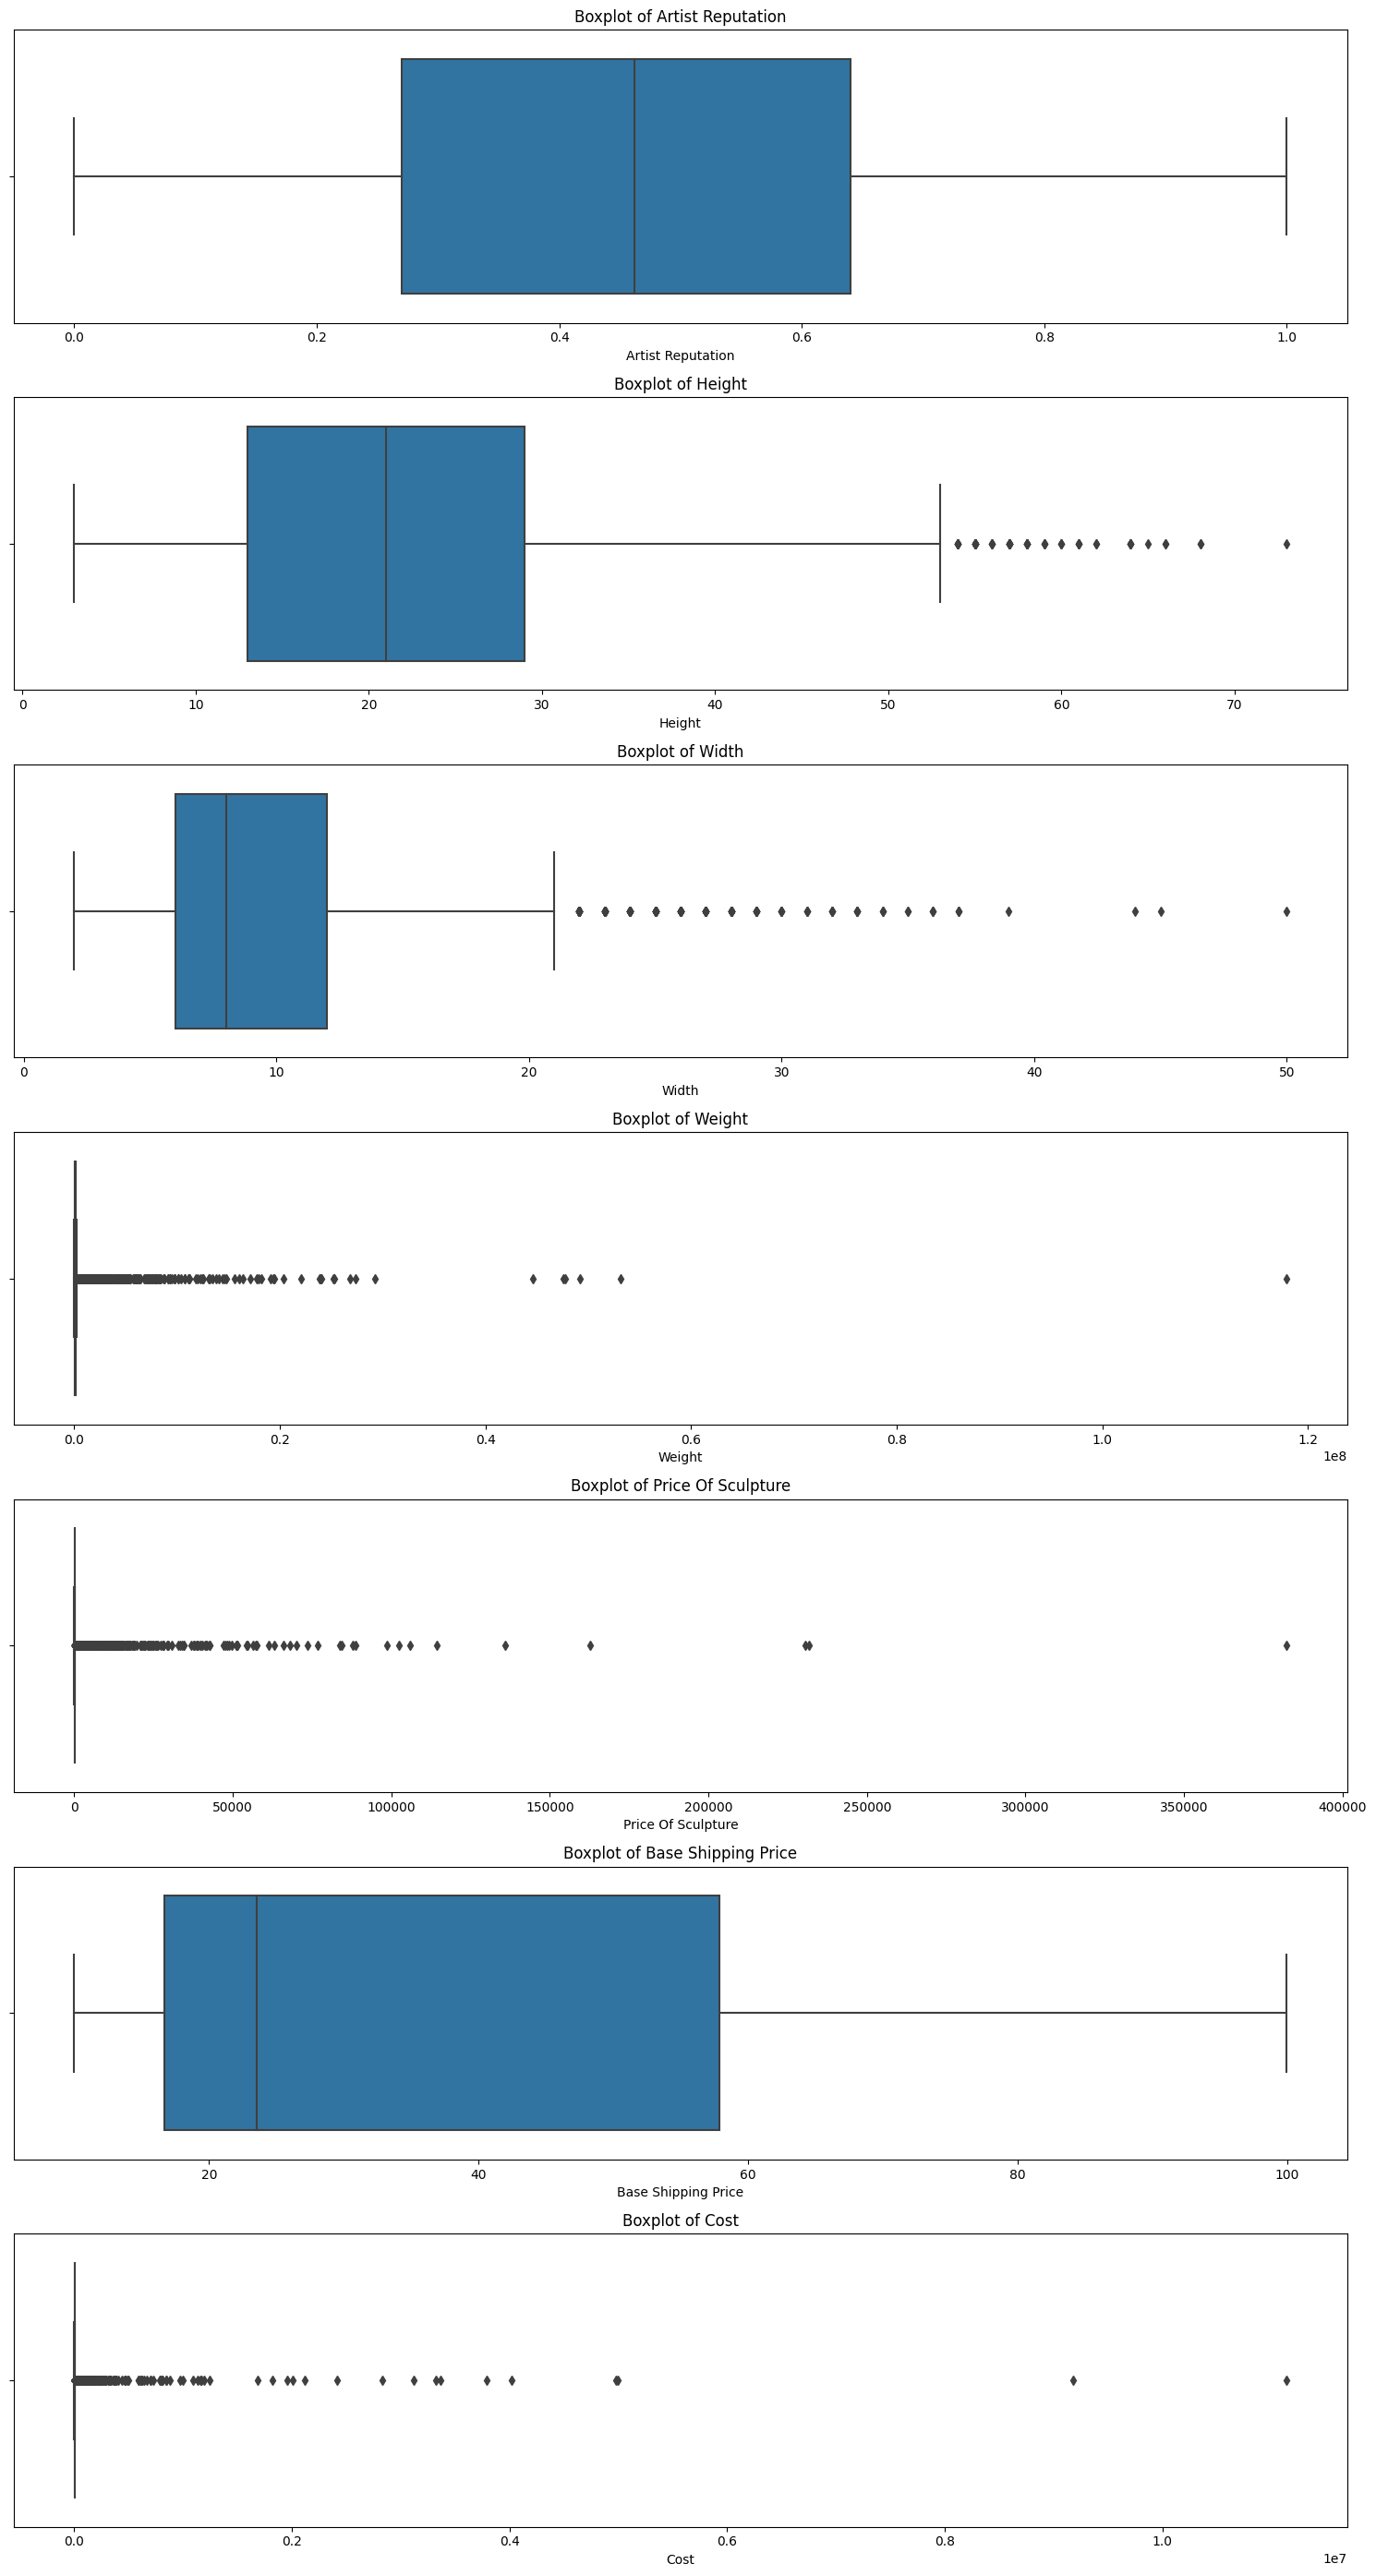

In [517]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


plt.figure(figsize=(15, len(numeric_cols)*4))  # Adjust height to number of features

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

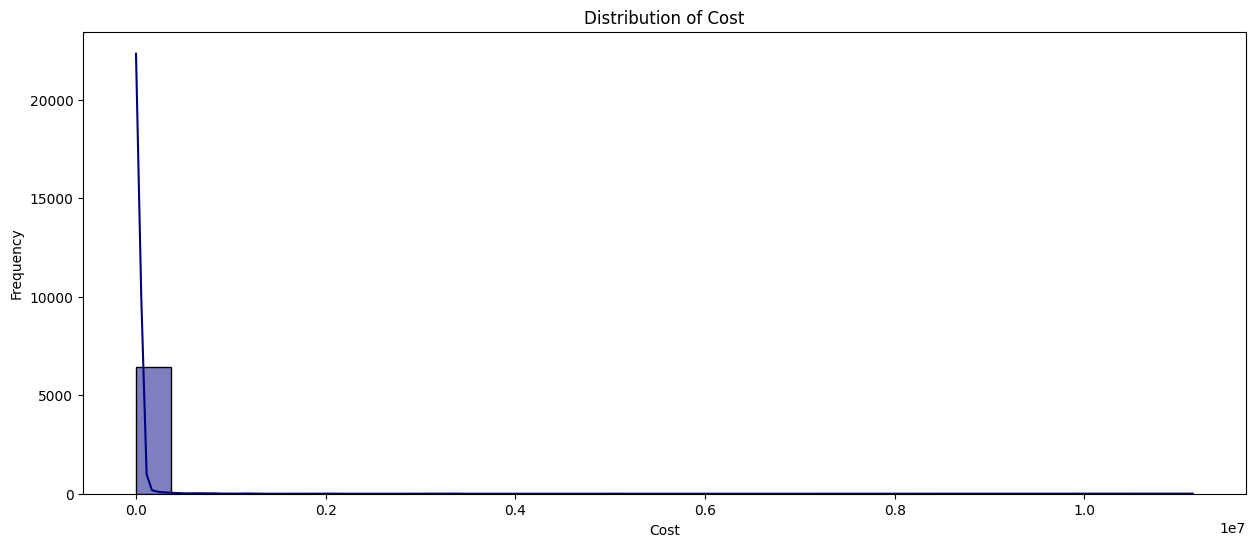

In [518]:
plt.figure(figsize=(15, 6))
sns.histplot(df['Cost'], kde=True, bins=30,color="navy")
plt.title('Distribution of Cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

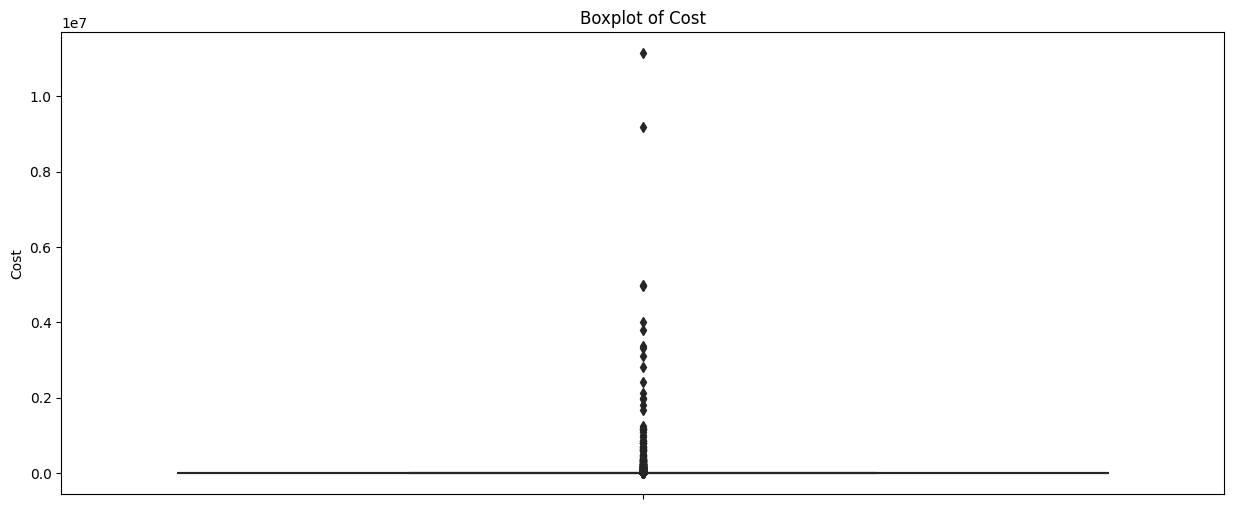

In [519]:
plt.figure(figsize=(15, 6))
sns.boxplot(y=df['Cost'],color="green")
plt.title('Boxplot of Cost')
plt.ylabel('Cost')
plt.show()

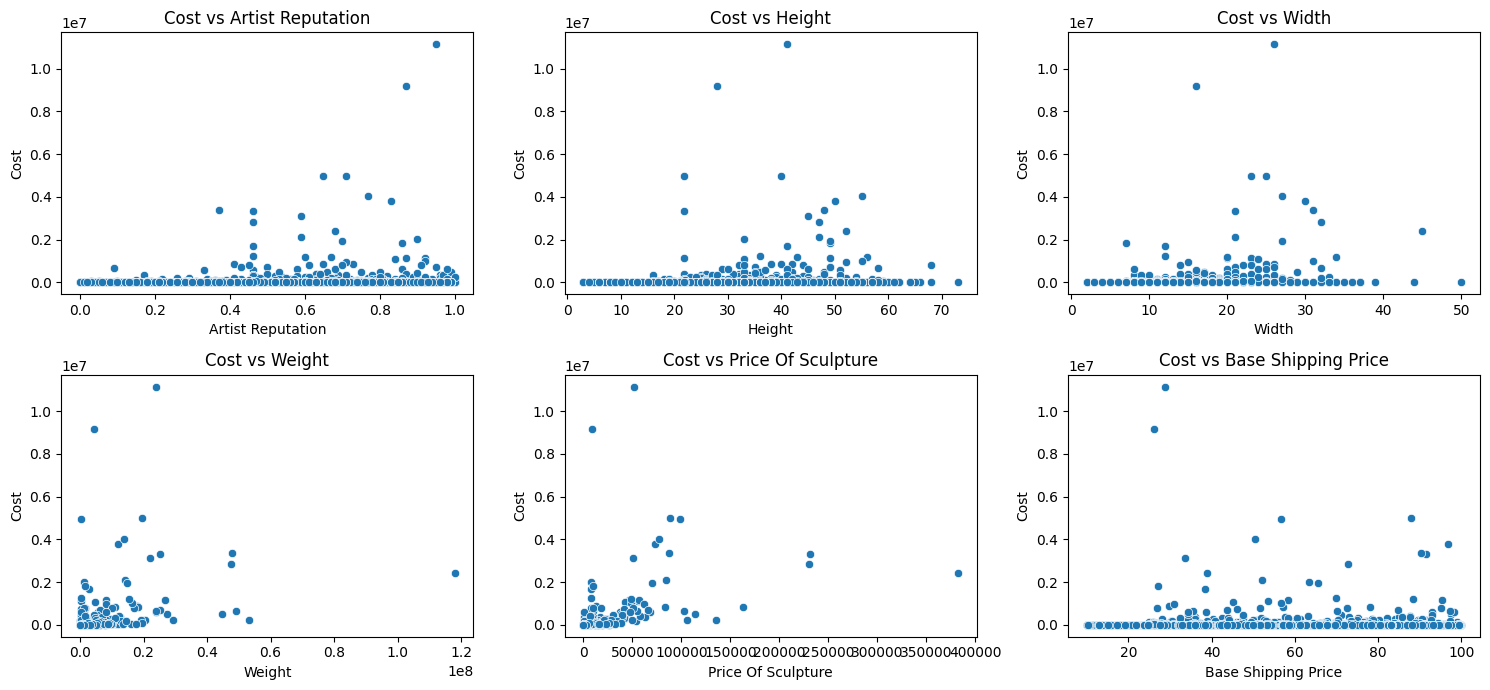

In [520]:
numerical_features = ['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price']
plt.figure(figsize=(15, 7))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[feature], y=df['Cost'])
    plt.title(f'Cost vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Cost')
plt.tight_layout()
plt.show()

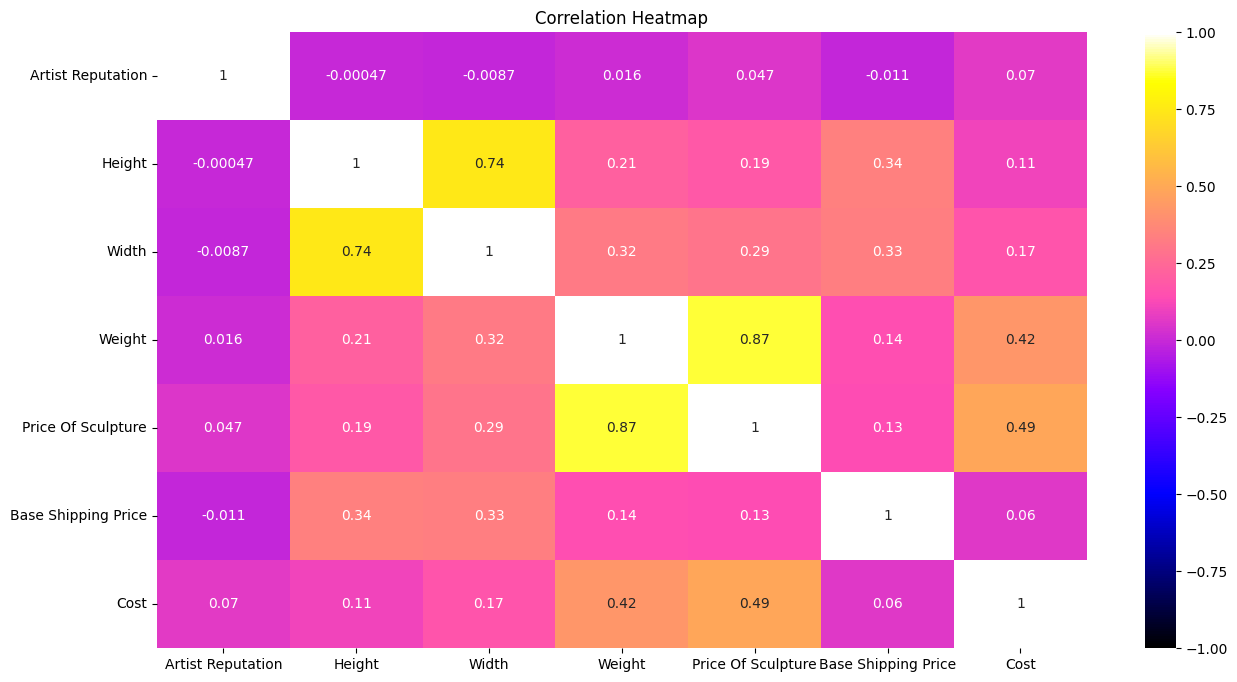

In [521]:
plt.figure(figsize=(15, 8))
correlation_matrix = df[numerical_features + ['Cost']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='gnuplot2', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

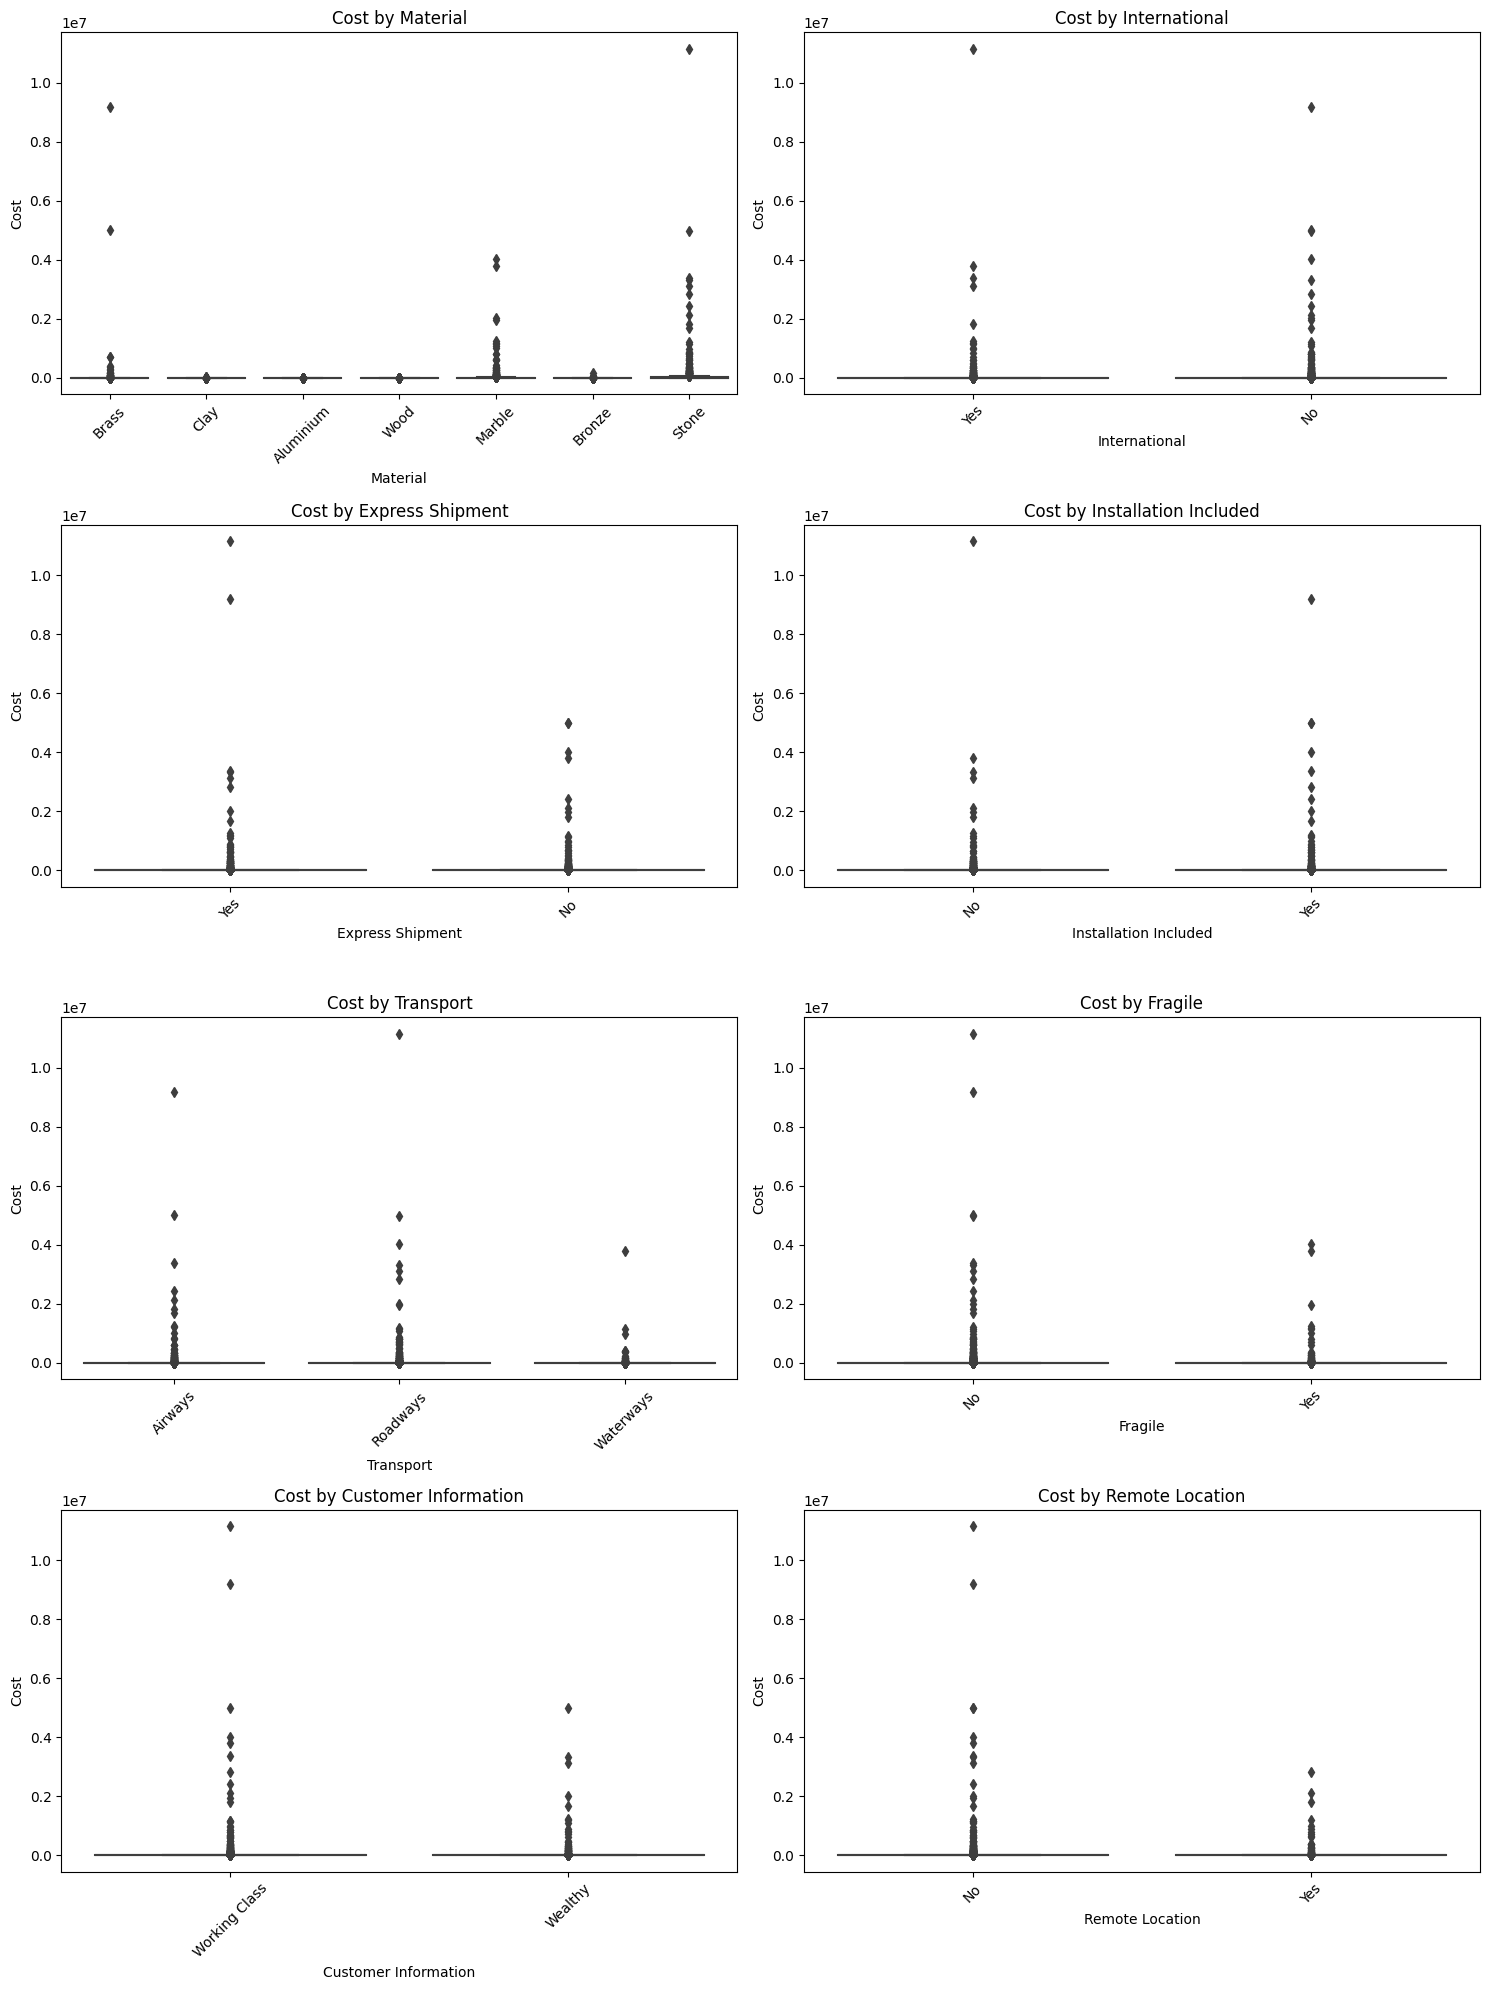

In [522]:
categorical_features = ['Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location']
plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[feature], y=df['Cost'])
    plt.title(f'Cost by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Cost')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

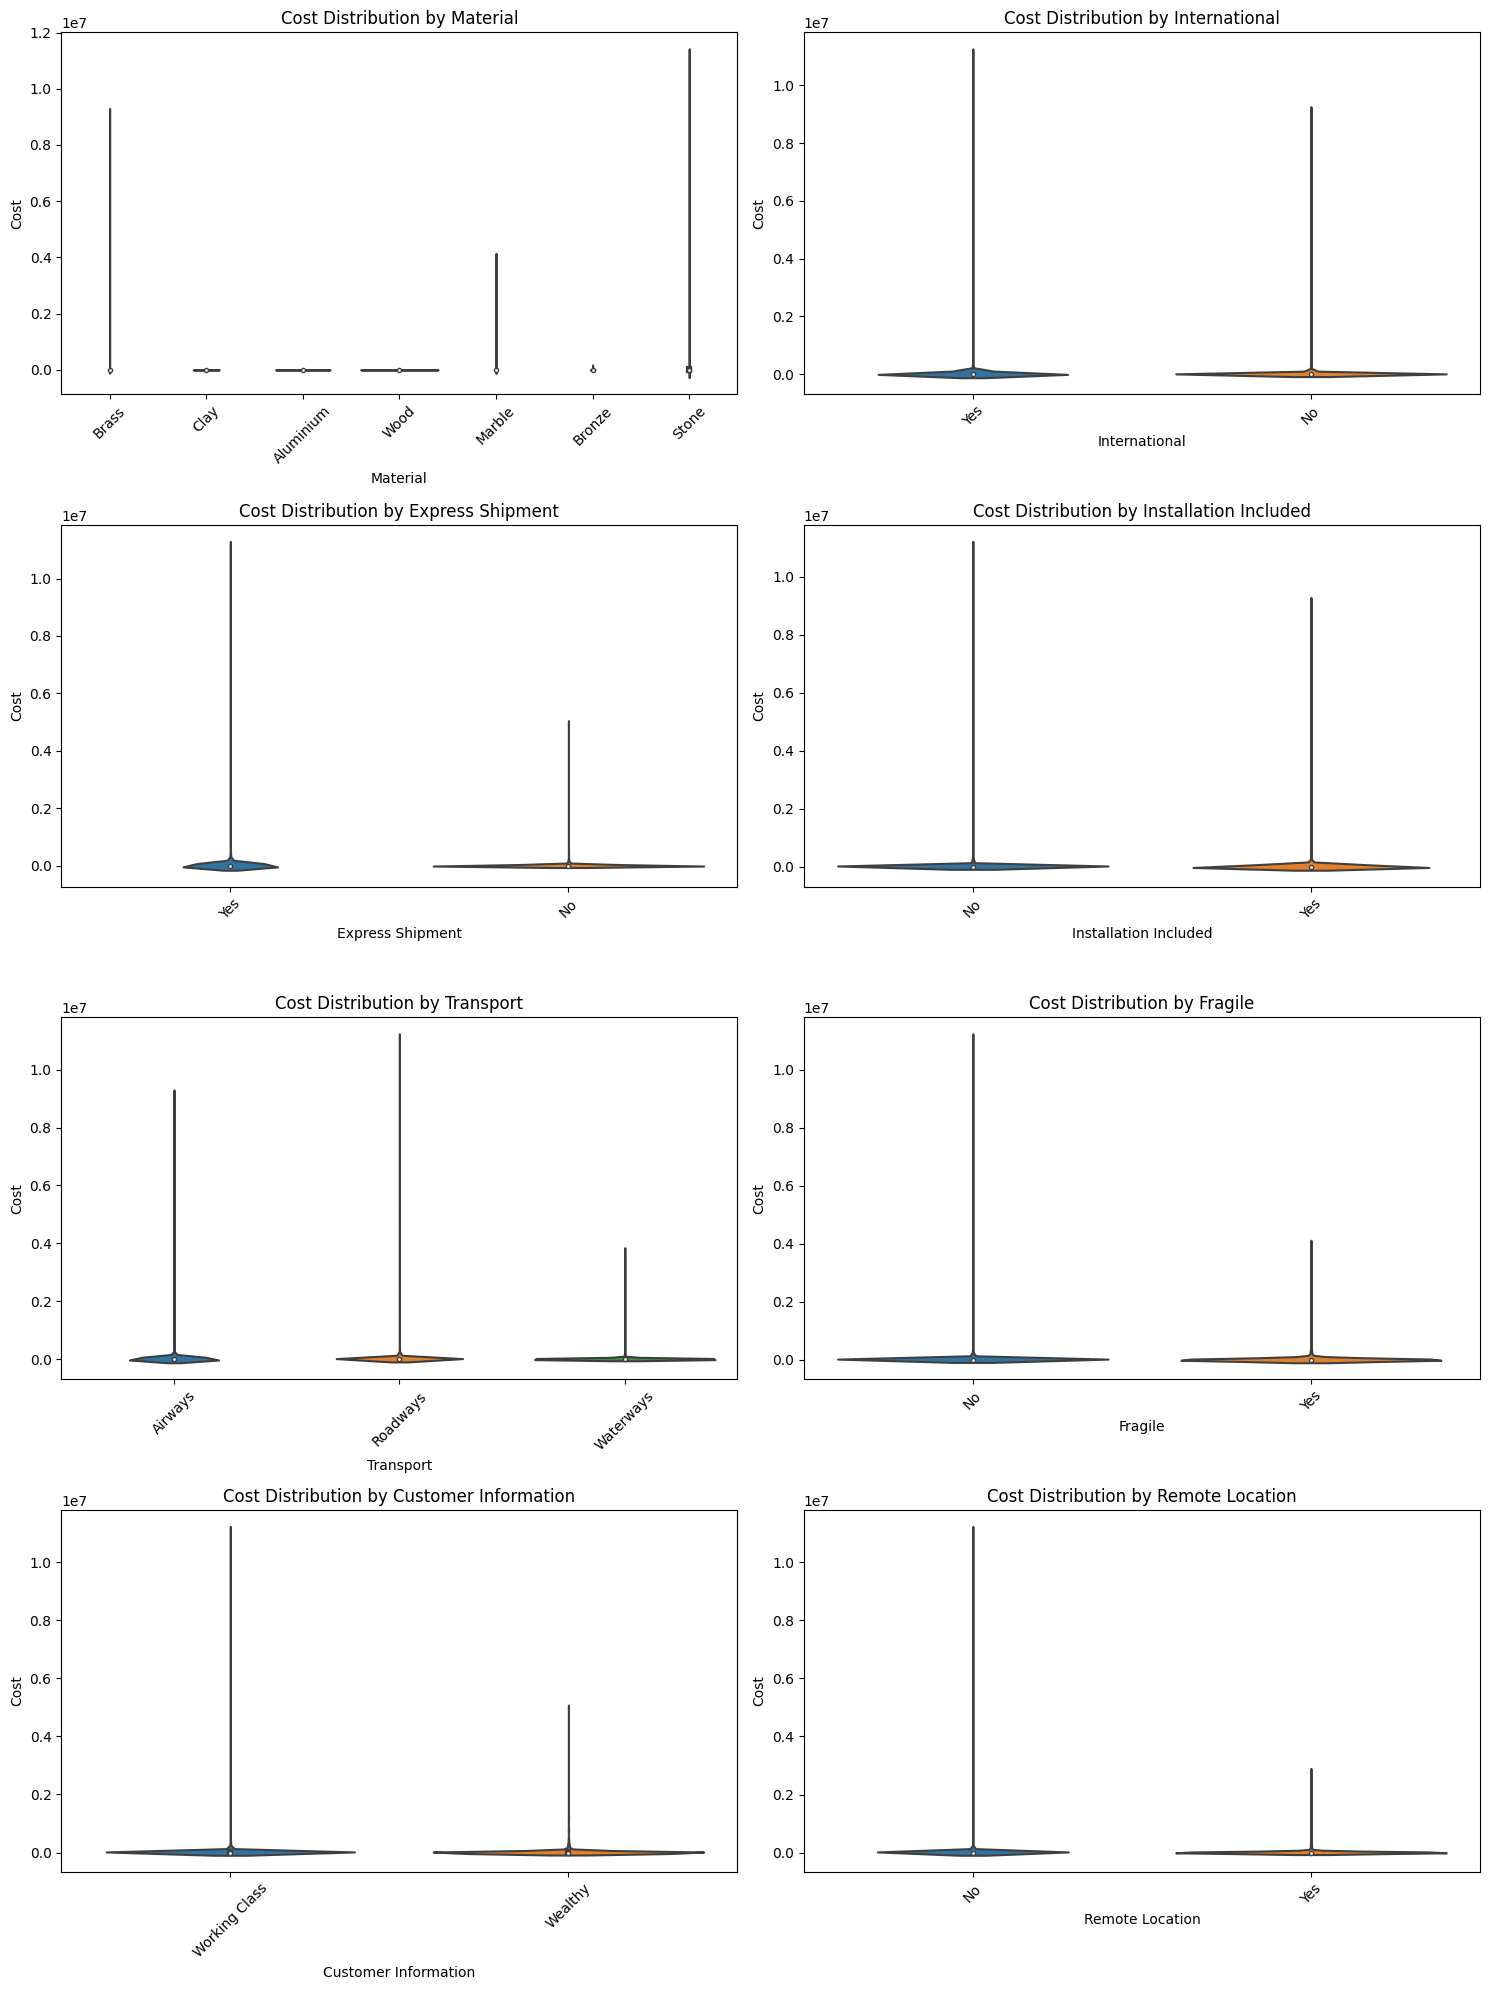

In [523]:
plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)
    sns.violinplot(x=df[feature], y=df['Cost'])
    plt.title(f'Cost Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Cost')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

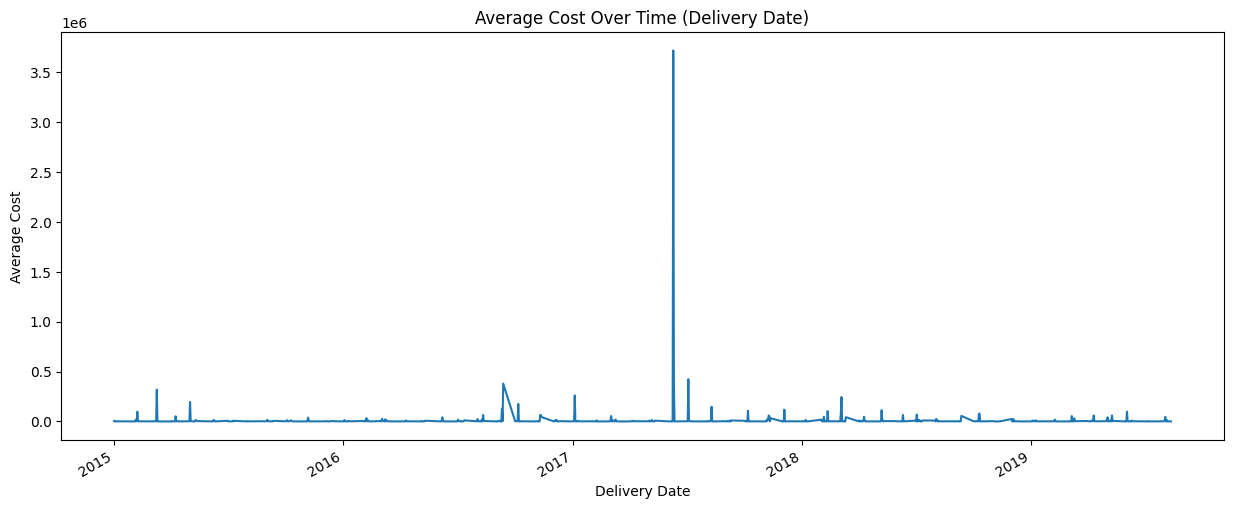

In [524]:
# Convert date columns to datetime
df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'], errors='coerce')
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'], errors='coerce')

plt.figure(figsize=(15, 6))
df.groupby('Delivery Date')['Cost'].mean().plot()
plt.title('Average Cost Over Time (Delivery Date)')
plt.xlabel('Delivery Date')
plt.ylabel('Average Cost')
plt.show()

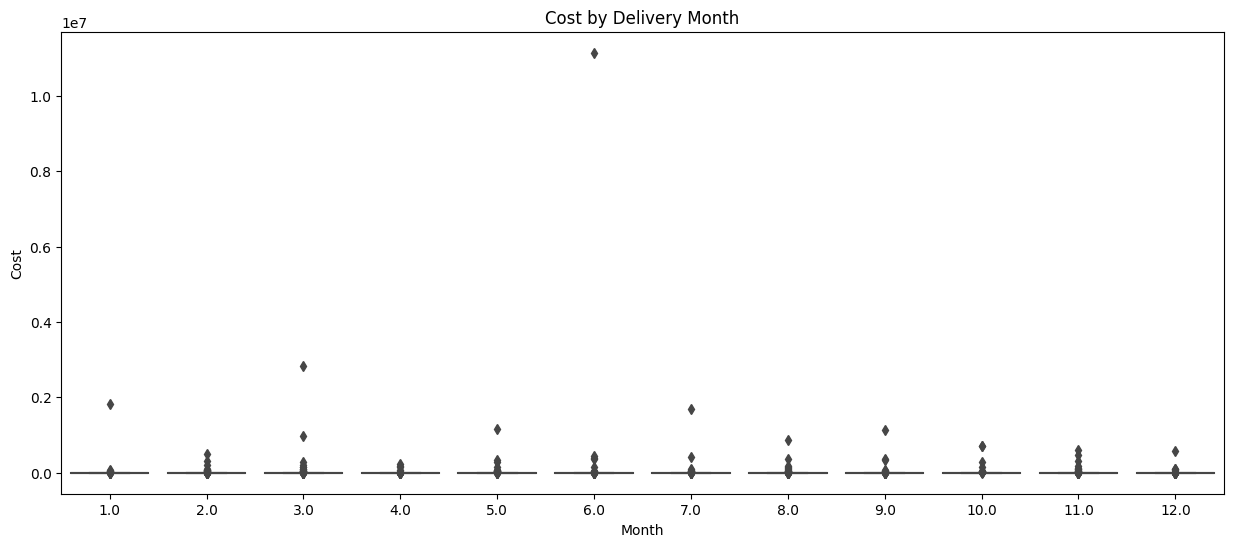

In [525]:
df['Delivery Month'] = df['Delivery Date'].dt.month
plt.figure(figsize=(15, 6))
sns.boxplot(x=df['Delivery Month'], y=df['Cost'])
plt.title('Cost by Delivery Month')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.show()

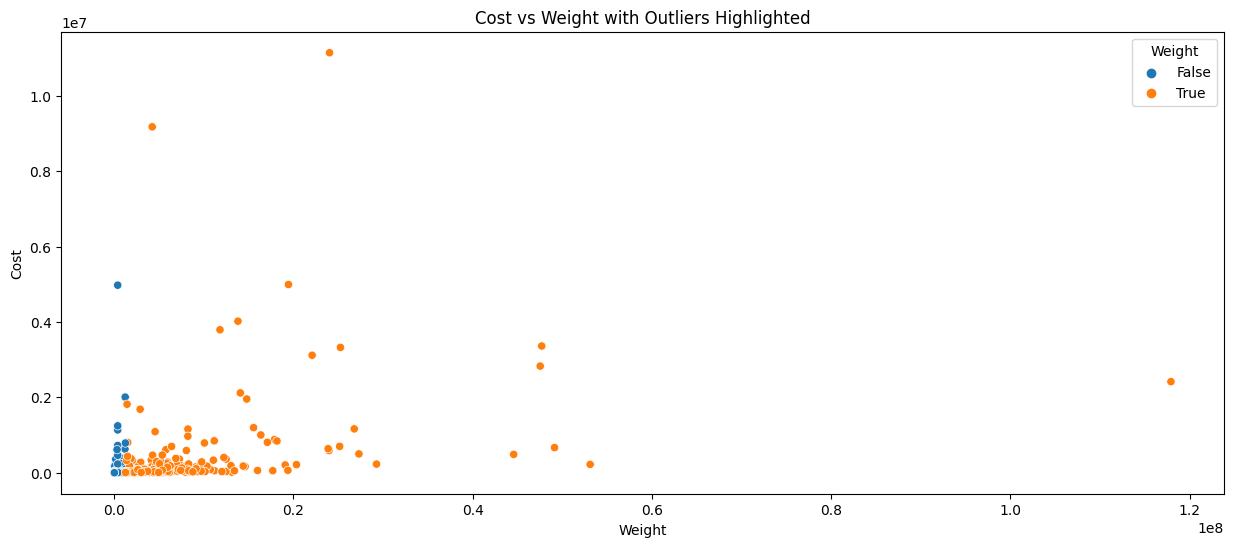

In [526]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=df['Weight'], y=df['Cost'], hue=(df['Weight'] > df['Weight'].quantile(0.95)))
plt.title('Cost vs Weight with Outliers Highlighted')
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.show()

<Figure size 1500x600 with 0 Axes>

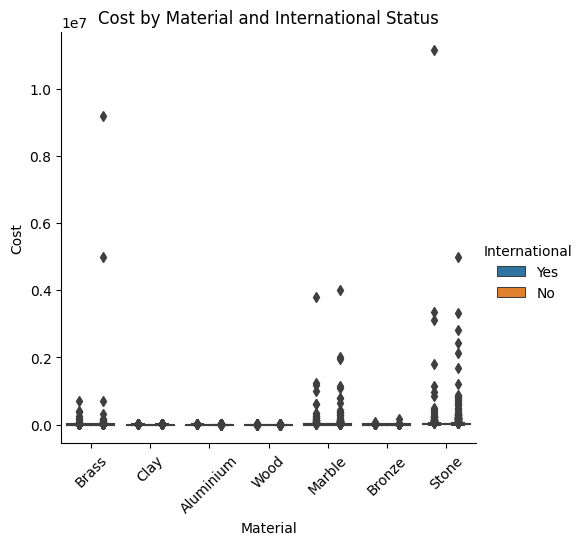

In [527]:
plt.figure(figsize=(15, 6))
sns.catplot(x='Material', y='Cost', hue='International', kind='box', data=df)
plt.title('Cost by Material and International Status')
plt.xticks(rotation=45)
plt.show()

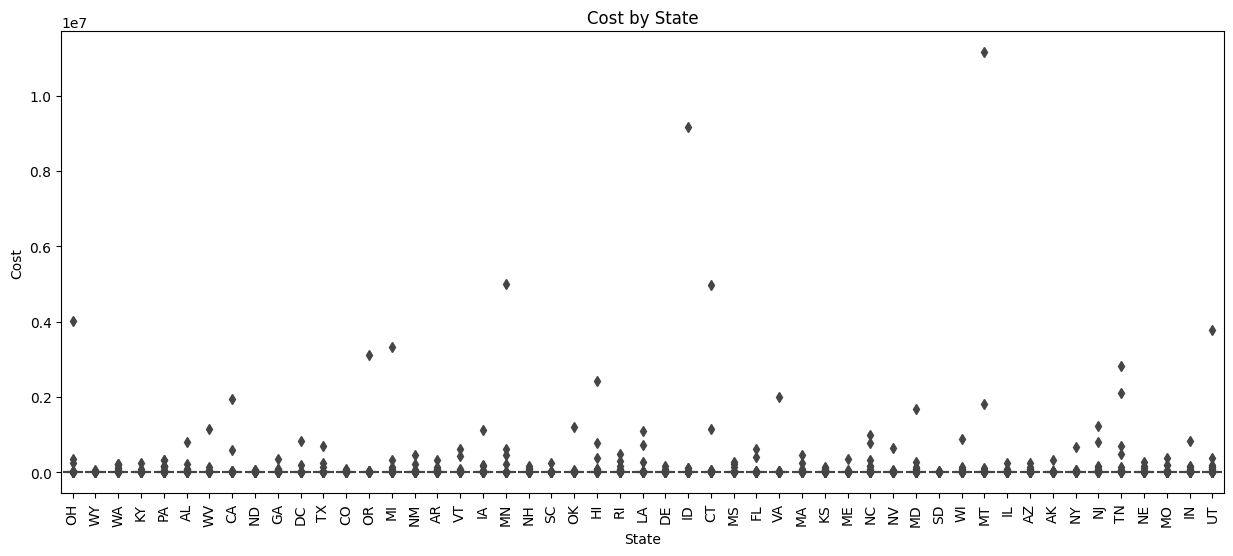

In [528]:

df['State'] = df['Customer Location'].str.extract(r',\s*(\w{2})\s*\d{5}$')
plt.figure(figsize=(15, 6))
sns.boxplot(x='State', y='Cost', data=df)
plt.title('Cost by State')
plt.xticks(rotation=90)
plt.show()

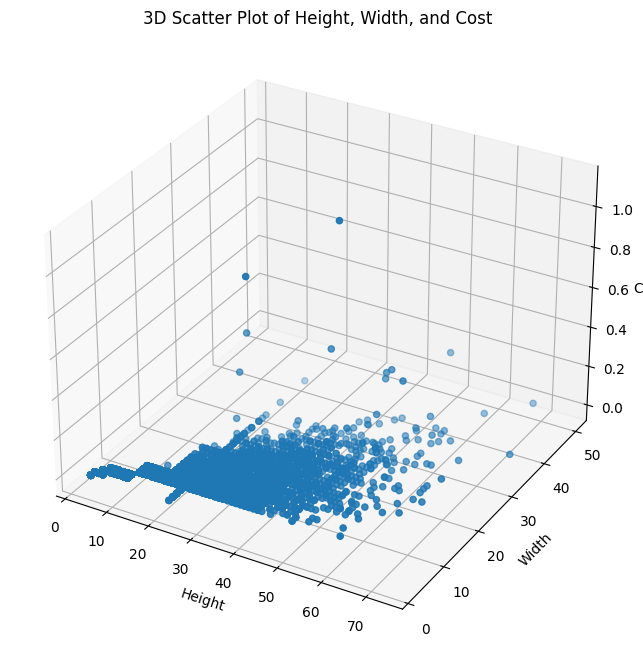

In [529]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Height'], df['Width'], df['Cost'])
ax.set_xlabel('Height')
ax.set_ylabel('Width')
ax.set_zlabel('Cost')
plt.title('3D Scatter Plot of Height, Width, and Cost')
plt.show()

In [530]:
cols = ['Height', 'Width', 'Weight', 'Price Of Sculpture']

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Keep rows where the column value is within bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


df = remove_outliers_iqr(df, cols)

In [531]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,...,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost,Delivery Month,State
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,...,Airways,No,Working Class,No,2015-06-07,2015-06-03,"New Michelle, OH 50777",283.29,6.0,OH
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,...,Roadways,No,Working Class,No,2017-03-06,2017-03-05,"New Michaelport, WY 12072",159.96,3.0,WY
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,...,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,"Bowmanshire, WA 19241",154.29,3.0,WA
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,...,Airways,No,Working Class,No,NaT,NaT,"Aprilside, PA 52793",159.23,NaN,PA
5,fffe3300390039003900,Tracy Francis,0.99,46.0,19.0,1178.0,Wood,6.16,16.88,No,...,Roadways,No,Wealthy,No,NaT,NaT,"Maddenberg, AL 43096",1922.78,NaN,AL


In [532]:
df.drop(columns=["Customer Id","Artist Name","Customer Location","Delivery Month"],axis=1,inplace=True)

In [533]:
df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'], errors='coerce')

# Extract features from Scheduled Date
df['Scheduled_Year'] = df['Scheduled Date'].dt.year
df['Scheduled_Month'] = df['Scheduled Date'].dt.month
df['Scheduled_Day'] = df['Scheduled Date'].dt.day
df['Scheduled_Weekday'] = df['Scheduled Date'].dt.weekday  # Monday=0, Sunday=6
df['Scheduled_WeekOfYear'] = df['Scheduled Date'].dt.isocalendar().week

df['Delivery Date'] = pd.to_datetime(df['Delivery Date'], errors='coerce')

# Extract features from Delivery Date
df['Delivery_Year'] = df['Delivery Date'].dt.year
df['Delivery_Month'] = df['Delivery Date'].dt.month
df['Delivery_Day'] = df['Delivery Date'].dt.day
df['Delivery_Weekday'] = df['Delivery Date'].dt.weekday  # Monday=0, Sunday=6
df['Delivery_WeekOfYear'] = df['Delivery Date'].dt.isocalendar().week

In [534]:
df.drop(columns=["Scheduled Date","Delivery Date"],axis=1,inplace=True)

In [535]:
# Use mode for month and weekday (most common category)
for col in ['Scheduled_Month', 'Scheduled_Weekday', 'Scheduled_WeekOfYear',
            'Delivery_Month', 'Delivery_Weekday', 'Delivery_WeekOfYear']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Use mean for year and day
for col in ['Scheduled_Year', 'Scheduled_Day',
            'Delivery_Year', 'Delivery_Day']:
    df[col] = df[col].fillna(df[col].mean())


mode=df["State"].mode()[0]
df["State"]=df["State"].fillna(mode)

In [536]:
from sklearn.preprocessing import LabelEncoder

cols = ["Material", "International", "Express Shipment", "Installation Included",
        "Transport", "Remote Location", "Customer Information","State","Fragile"]

label_encoders = {}

for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"{col} mapping:")
    for i, class_ in enumerate(le.classes_):
        print(f"  {i} -> {class_}")
    print()


Material mapping:
  0 -> Aluminium
  1 -> Brass
  2 -> Bronze
  3 -> Clay
  4 -> Marble
  5 -> Stone
  6 -> Wood

International mapping:
  0 -> No
  1 -> Yes

Express Shipment mapping:
  0 -> No
  1 -> Yes

Installation Included mapping:
  0 -> No
  1 -> Yes

Transport mapping:
  0 -> Airways
  1 -> Roadways
  2 -> Waterways

Remote Location mapping:
  0 -> No
  1 -> Yes

Customer Information mapping:
  0 -> Wealthy
  1 -> Working Class

State mapping:
  0 -> AK
  1 -> AL
  2 -> AR
  3 -> AZ
  4 -> CA
  5 -> CO
  6 -> CT
  7 -> DC
  8 -> DE
  9 -> FL
  10 -> GA
  11 -> HI
  12 -> IA
  13 -> ID
  14 -> IL
  15 -> IN
  16 -> KS
  17 -> KY
  18 -> LA
  19 -> MA
  20 -> MD
  21 -> ME
  22 -> MI
  23 -> MN
  24 -> MO
  25 -> MS
  26 -> MT
  27 -> NC
  28 -> ND
  29 -> NE
  30 -> NH
  31 -> NJ
  32 -> NM
  33 -> NV
  34 -> NY
  35 -> OH
  36 -> OK
  37 -> OR
  38 -> PA
  39 -> RI
  40 -> SC
  41 -> SD
  42 -> TN
  43 -> TX
  44 -> UT
  45 -> VA
  46 -> VT
  47 -> WA
  48 -> WI
  49 -> WV
  5

In [537]:
from sklearn.ensemble import RandomForestRegressor

# Features and target
X = df.drop("Cost", axis=1)
y = df["Cost"]

# Fit model
model = RandomForestRegressor()
model.fit(X, y)

# Get top 5 features
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(5).index.tolist()

# Add the target column
top_features.append("Cost")

# Create new dataset
df = df[top_features]

df.head()

,Artist Reputation,Base Shipping Price,Price Of Sculpture,Height,Weight,Cost
0,0.26,16.27,13.91,17.0,4128.0,283.29
1,0.28,15.00,6.83,3.0,61.0,159.96
2,0.07,21.18,4.96,8.0,237.0,154.29
4,0.15,11.94,3.18,17.0,324.0,159.23
5,0.99,16.88,6.16,46.0,1178.0,1922.78


In [538]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

X = df.drop(columns=["Cost"],axis=1)
y = df['Cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [539]:
model = CatBoostRegressor(iterations=2000, depth=6, learning_rate=0.3, verbose=500)
model.fit(X_train, y_train)

0:	learn: 370.6779562	total: 2.42ms	remaining: 4.83s
500:	learn: 33.0424189	total: 833ms	remaining: 2.49s
1000:	learn: 15.7734269	total: 1.75s	remaining: 1.75s
1500:	learn: 8.7558683	total: 2.58s	remaining: 857ms
1999:	learn: 5.0053072	total: 3.4s	remaining: 0us


In [540]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 48798.83
R² Score: 0.82


Train MSE: 25.05, Train R²: 1.00
Test MSE: 48798.83, Test R²: 0.82


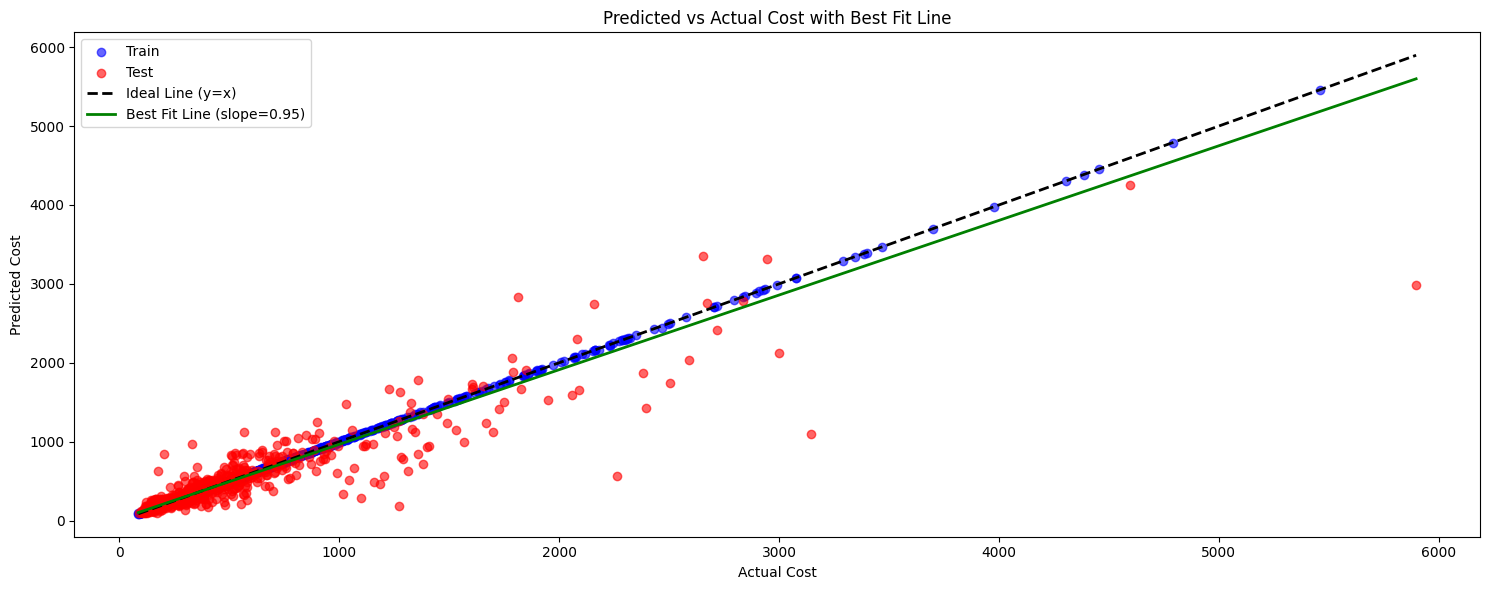

In [541]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"Train MSE: {mse_train:.2f}, Train R²: {r2_train:.2f}")
print(f"Test MSE: {mse_test:.2f}, Test R²: {r2_test:.2f}")

y_actual = np.concatenate([y_train, y_test])
y_pred = np.concatenate([y_train_pred, y_test_pred])


coefficients = np.polyfit(y_actual, y_pred, 1)
polynomial = np.poly1d(coefficients)
line_x = np.linspace(y_actual.min(), y_actual.max(), 100)
line_y = polynomial(line_x)

plt.figure(figsize=(15, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Train', alpha=0.6)
plt.scatter(y_test, y_test_pred, color='red', label='Test', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Line (y=x)')
plt.plot(line_x, line_y, 'g-', lw=2, label=f'Best Fit Line (slope={coefficients[0]:.2f})')
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Predicted vs Actual Cost with Best Fit Line')
plt.legend()
plt.tight_layout()
plt.show()

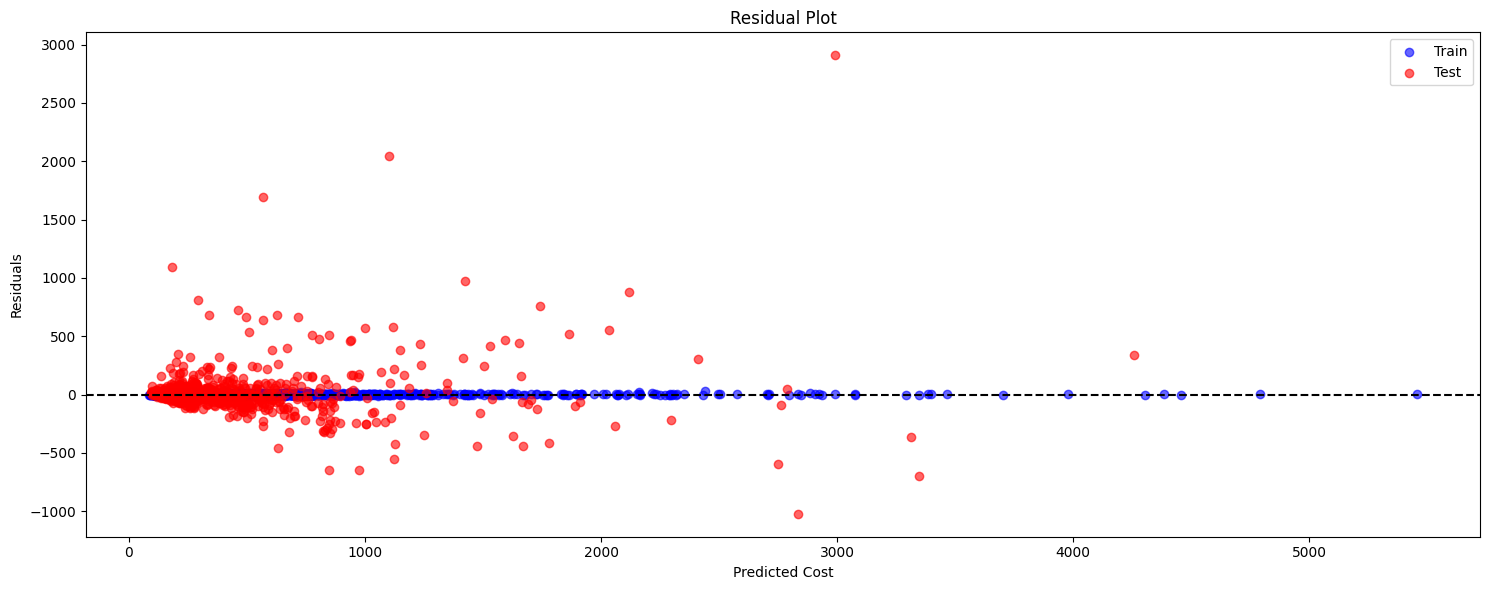

In [542]:
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

plt.figure(figsize=(15, 6))
plt.scatter(y_train_pred, residuals_train, color='blue', label='Train', alpha=0.6)
plt.scatter(y_test_pred, residuals_test, color='red', label='Test', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Cost')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.tight_layout()
plt.show()

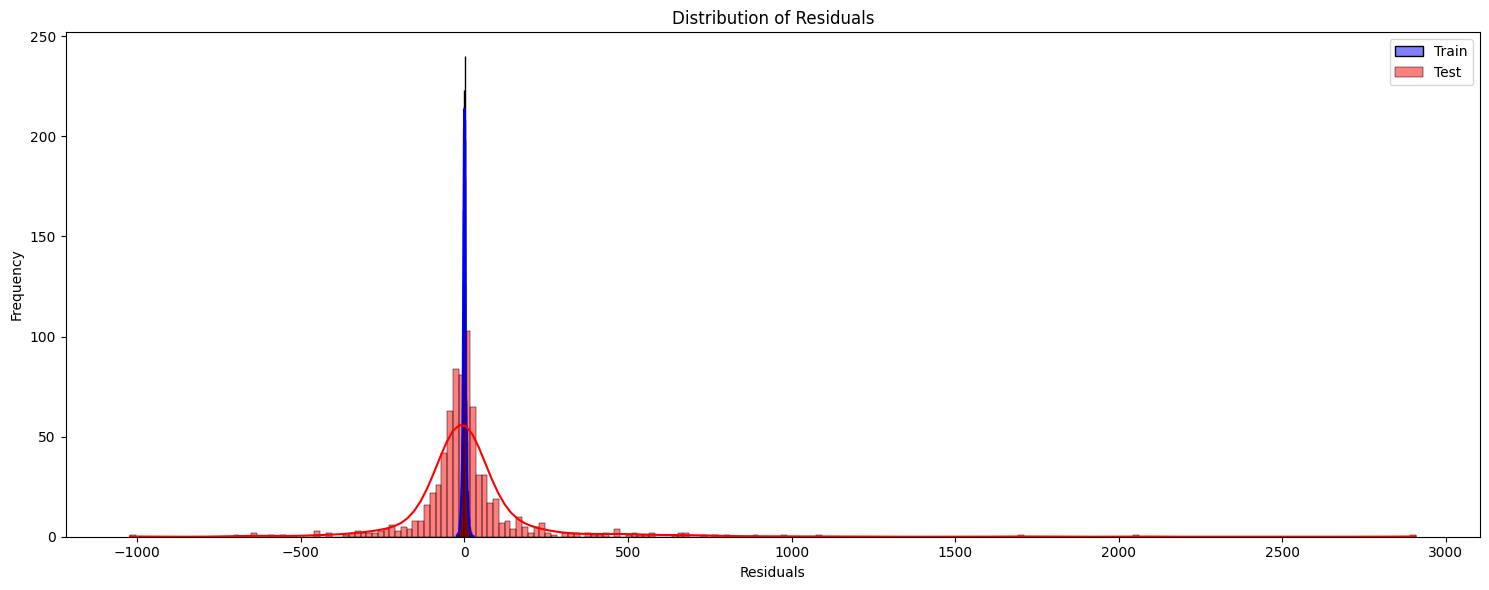

In [543]:
plt.figure(figsize=(15, 6))
sns.histplot(residuals_train, kde=True, color='blue', label='Train', alpha=0.5)
sns.histplot(residuals_test, kde=True, color='red', label='Test', alpha=0.5)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.legend()
plt.tight_layout()
plt.show()

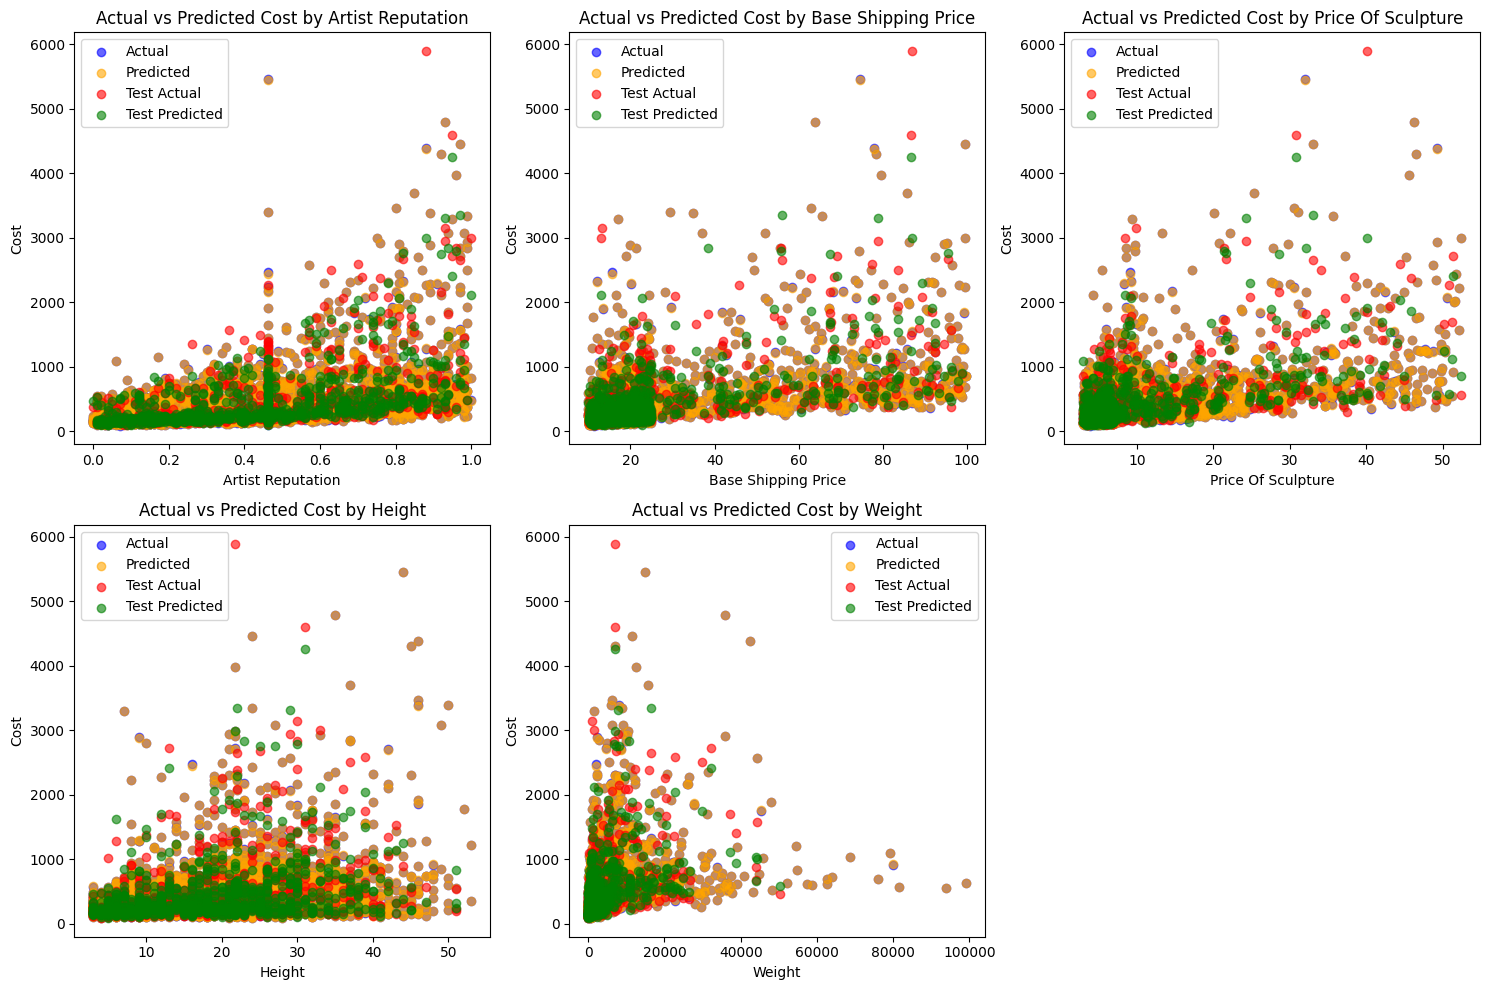

In [544]:
features = X.columns
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(X_train[feature], y_train, color='blue', label='Actual', alpha=0.6)
    plt.scatter(X_train[feature], y_train_pred, color='orange', label='Predicted', alpha=0.6)
    if len(X_test) > 0:
        plt.scatter(X_test[feature], y_test, color='red', label='Test Actual', alpha=0.6)
        plt.scatter(X_test[feature], y_test_pred, color='green', label='Test Predicted', alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel('Cost')
    plt.title(f'Actual vs Predicted Cost by {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

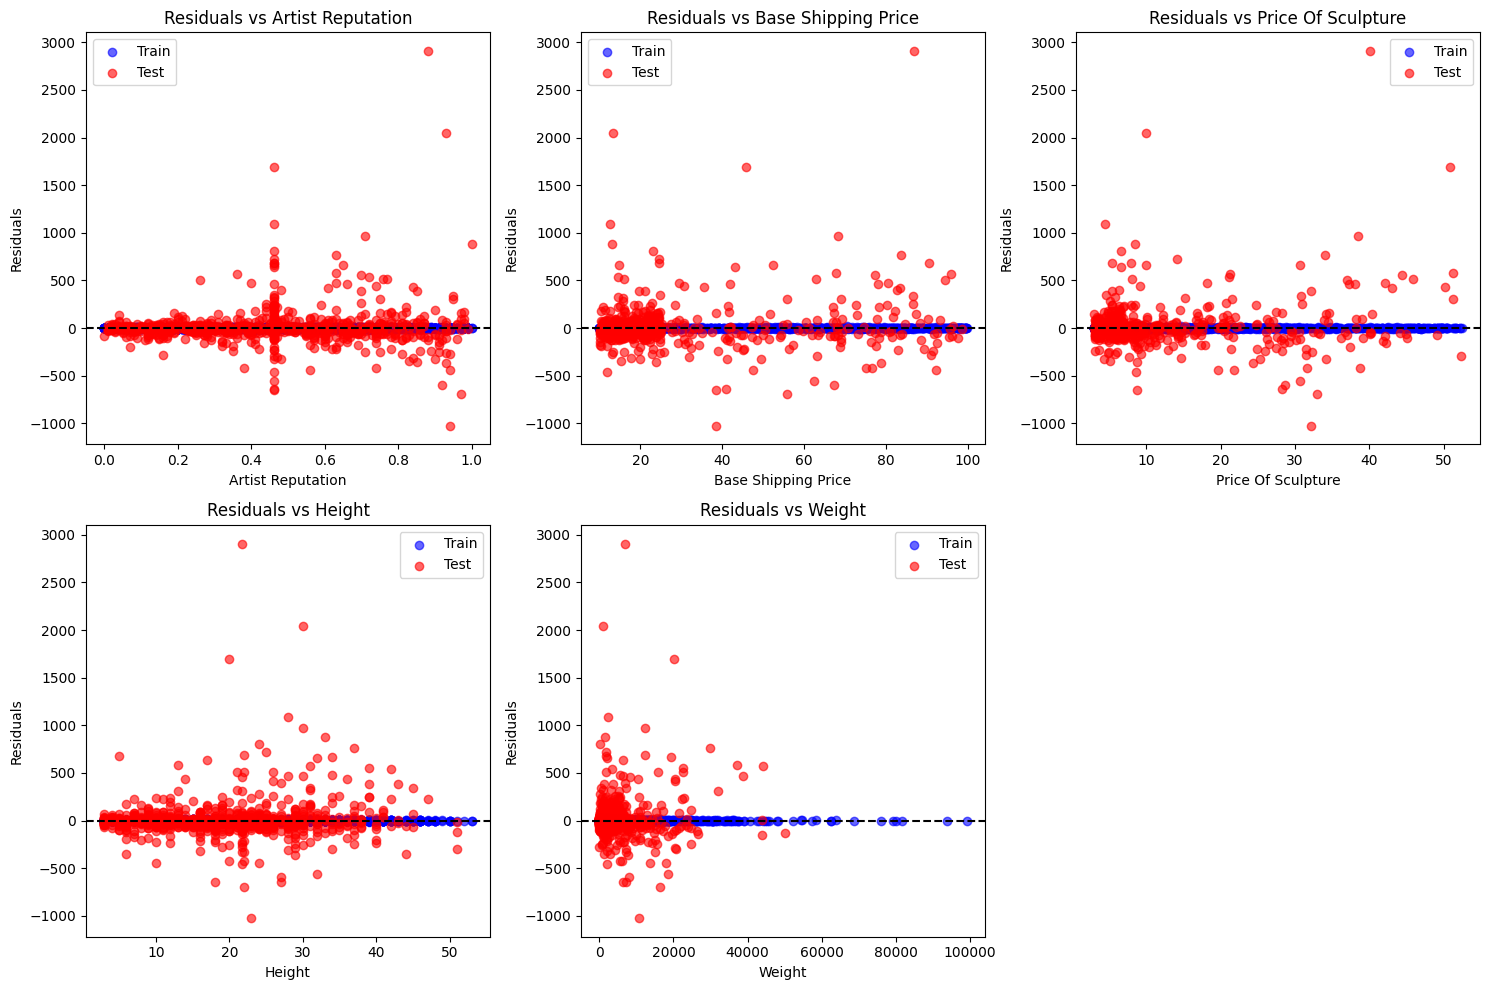

In [545]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(X_train[feature], residuals_train, color='blue', label='Train', alpha=0.6)
    if len(X_test) > 0:
        plt.scatter(X_test[feature], residuals_test, color='red', label='Test', alpha=0.6)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel(feature)
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

In [546]:
from sklearn.inspection import PartialDependenceDisplay
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=y_train, y=y_train_pred, mode='markers', name='Train',
                         marker=dict(color='blue', opacity=0.6)))
fig.add_trace(go.Scatter(x=y_test, y=y_test_pred, mode='markers', name='Test',
                         marker=dict(color='red', opacity=0.6)))
fig.add_trace(go.Scatter(x=[y.min(), y.max()], y=[y.min(), y.max()], mode='lines',
                         line=dict(color='black', dash='dash'), name='Ideal'))
fig.add_trace(go.Scatter(x=line_x, y=line_y, mode='lines',
                         line=dict(color='green'), name=f'Best Fit Line (slope={coefficients[0]:.2f})'))
fig.update_layout(title='Predicted vs. Actual Cost (Interactive)',
                 xaxis_title='Actual Cost', yaxis_title='Predicted Cost',
                 showlegend=True)
fig.show()

0:	learn: 489.1877603	total: 1.44ms	remaining: 2.87s
500:	learn: 0.2748847	total: 429ms	remaining: 1.28s
1000:	learn: 0.0021754	total: 948ms	remaining: 946ms
1500:	learn: 0.0000215	total: 1.43s	remaining: 475ms
1999:	learn: 0.0000002	total: 1.88s	remaining: 0us
0:	learn: 436.3101562	total: 1.38ms	remaining: 2.76s
500:	learn: 7.5437053	total: 548ms	remaining: 1.64s
1000:	learn: 1.2776603	total: 1.09s	remaining: 1.09s
1500:	learn: 0.2475761	total: 1.64s	remaining: 544ms
1999:	learn: 0.0489317	total: 2.2s	remaining: 0us
0:	learn: 411.1228776	total: 1.35ms	remaining: 2.7s
500:	learn: 17.6841514	total: 608ms	remaining: 1.82s
1000:	learn: 5.3175058	total: 1.23s	remaining: 1.23s
1500:	learn: 1.7368451	total: 1.87s	remaining: 622ms
1999:	learn: 0.5675653	total: 2.5s	remaining: 0us
0:	learn: 407.3847465	total: 1.46ms	remaining: 2.92s
500:	learn: 25.8846949	total: 673ms	remaining: 2.01s
1000:	learn: 9.4965374	total: 1.35s	remaining: 1.35s
1500:	learn: 4.0865834	total: 2.03s	remaining: 674ms
1999

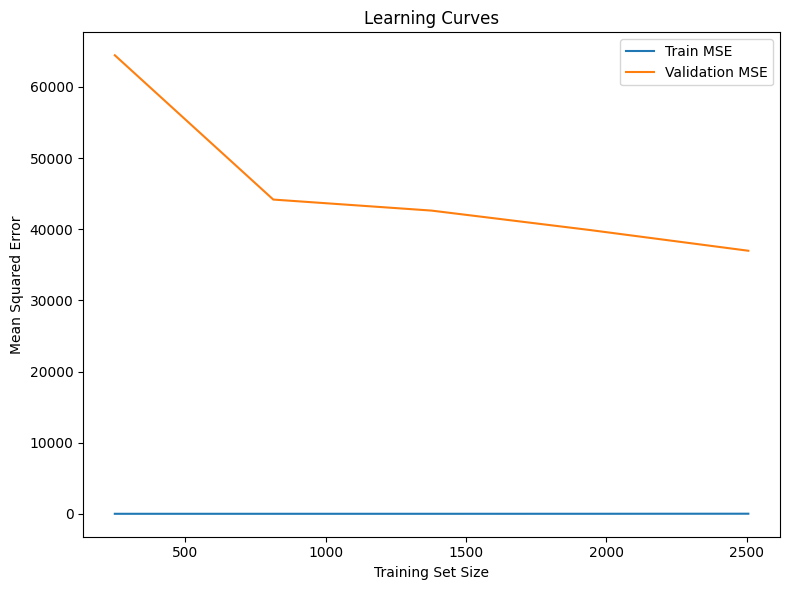

In [547]:
from sklearn.model_selection import train_test_split, learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=3, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Train MSE')
plt.plot(train_sizes, test_scores_mean, label='Validation MSE')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves')
plt.legend()
plt.tight_layout()
plt.show()

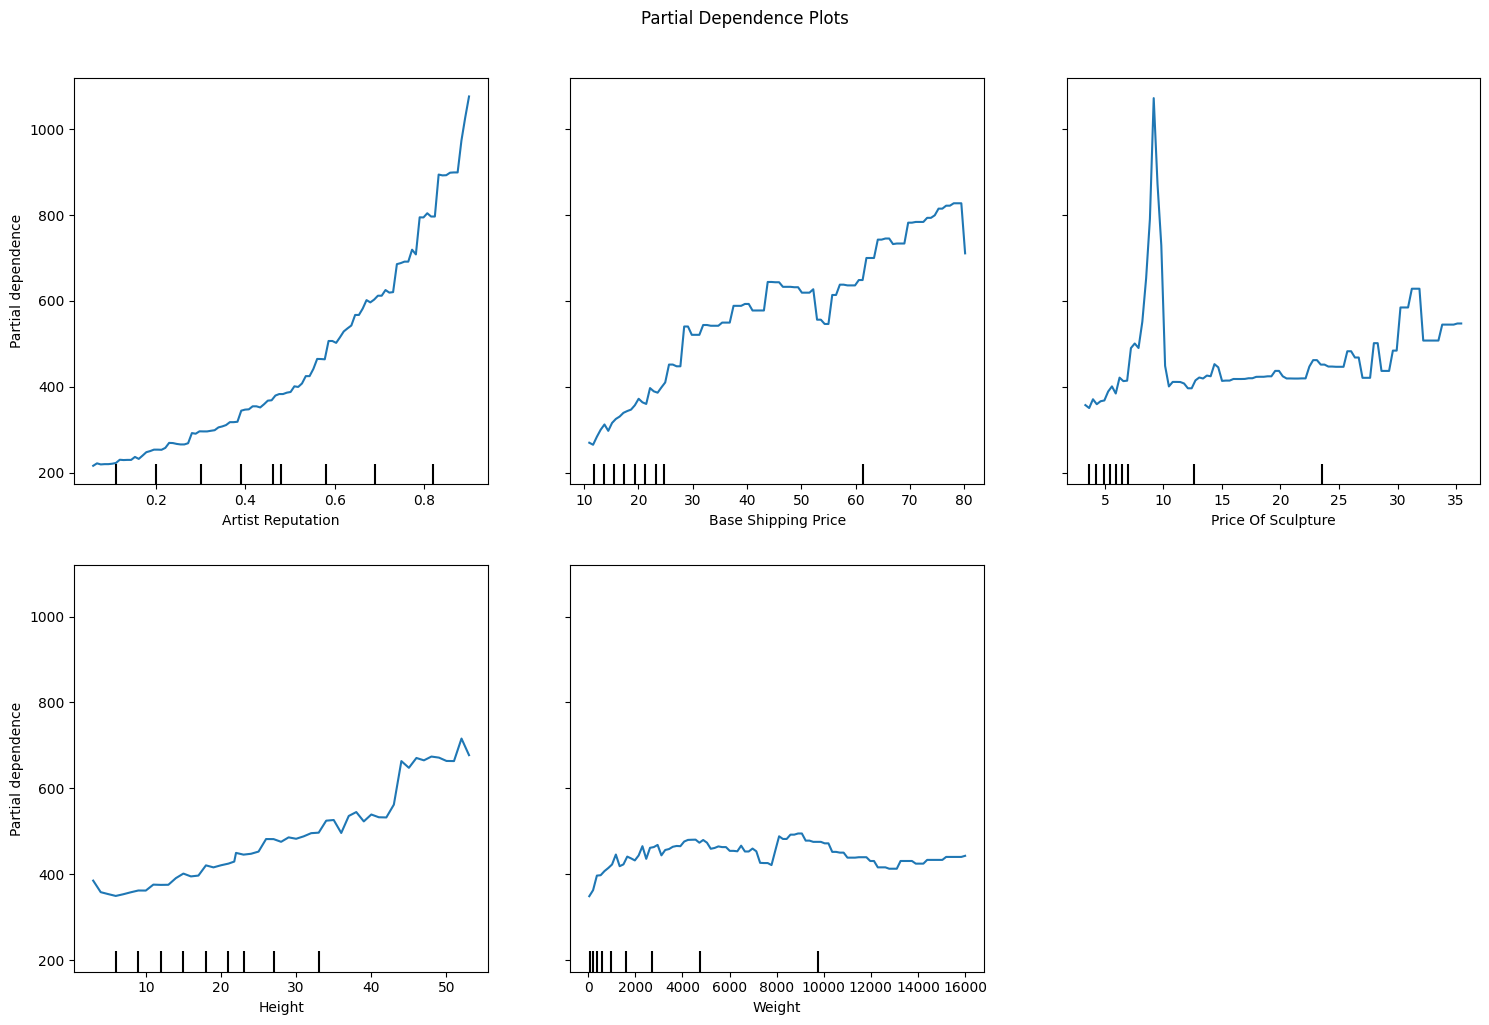

In [548]:
fig, ax = plt.subplots(figsize=(15, 10))
PartialDependenceDisplay.from_estimator(model, X_train, features=features, ax=ax)
plt.suptitle('Partial Dependence Plots', y=1.02)
plt.tight_layout()
plt.show()

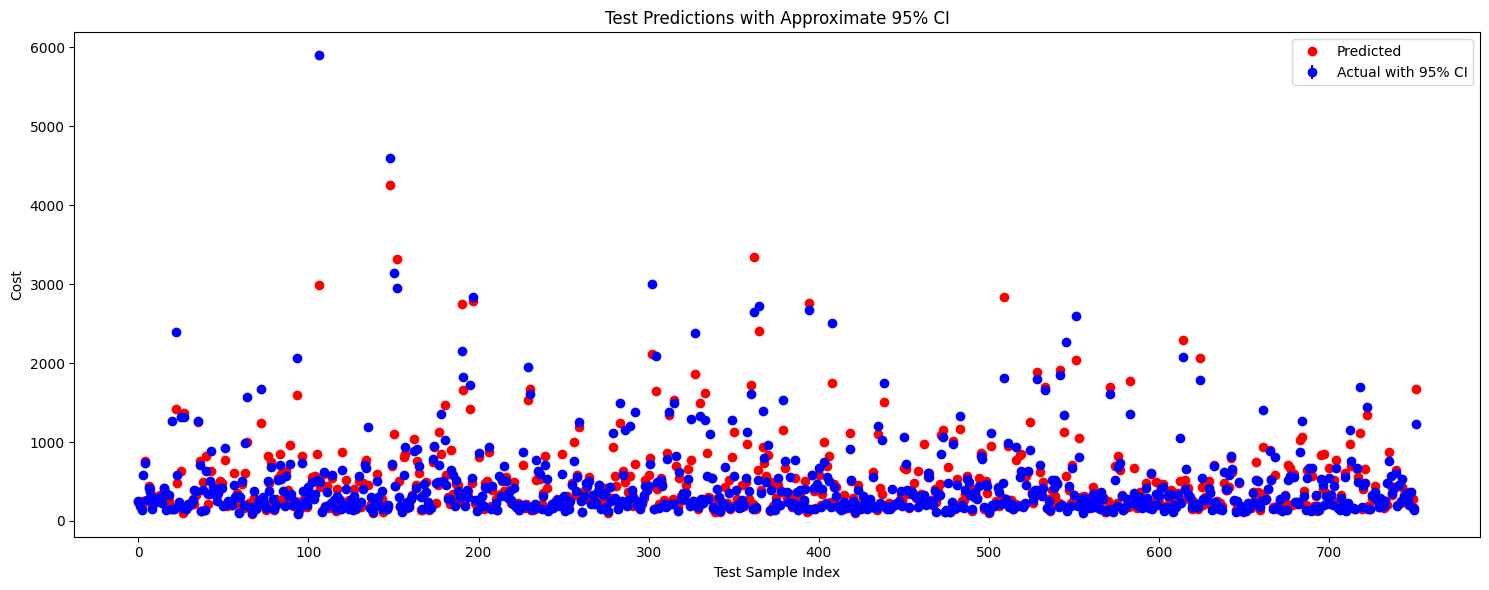

In [549]:
np.random.seed(42)
n_bootstrap = 50
predictions = np.zeros((len(X_test), n_bootstrap))
for i in range(n_bootstrap):
    model_temp = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, verbose=False)
    model_temp.fit(X_train, y_train)
    predictions[:, i] = model_temp.predict(X_test)

pred_mean = predictions.mean(axis=1)
pred_std = predictions.std(axis=1)
ci_lower = pred_mean - 1.96 * pred_std
ci_upper = pred_mean + 1.96 * pred_std

plt.figure(figsize=(15, 6))
plt.errorbar(range(len(y_test)), y_test, yerr=[pred_mean - ci_lower, ci_upper - pred_mean], fmt='o', color='blue', label='Actual with 95% CI')
plt.plot(range(len(y_test)), y_test_pred, 'ro', label='Predicted')
plt.xlabel('Test Sample Index')
plt.ylabel('Cost')
plt.title('Test Predictions with Approximate 95% CI')
plt.legend()
plt.tight_layout()
plt.show()

In [550]:
import pickle
f=open("catboost_regressor.pkl","wb")
pickle.dump(mode,f)
f.close()